In [17]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import PolynomialFeatures

In [18]:
filename = 'E:\Internship\Gold\GOLD.csv'
outfile  = 'E:\Internship\Gold/module_3/GOLD.csv'
X_fields = ['Price','Open','High','Low']
Y_field  = 'Pred'

In [19]:
data = {}
data['raw']     = pd.read_csv( filename, parse_dates=['Date'] )
data['raw'].set_index( data['raw'].Date, inplace=True )

# Alteratively use: sklearn.model_selection.train_test_split() if not a natural na split in the dataset
data['train']   = data['raw'][ -np.isnan(data['raw']['Pred']) ]  # -Series() == np.invert()
data['test']    = data['raw'][  np.isnan(data['raw']['Pred']) ]  # Gold dataset has empty Pred values for test data
data['train'].head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
2017-05-04,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [20]:
data['test'].head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
2018-12-11,2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
2018-12-12,2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
2018-12-13,2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
2018-12-14,2018-12-14,31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
2018-12-17,2018-12-17,31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976


In [21]:
model_pred = LinearRegression().fit( data['train'][ X_fields ], data['train']['Pred'] )


In [22]:
model_pred.score( data['train'][ X_fields ], data['train']['Pred'] )


1.0

In [23]:
model_pred.coef_


array([ 2.,  3., -1., -4.])

In [24]:
model_pred.intercept_


5.553602022700943e-11

In [25]:
data['train']['Pred_2'] = model_pred.predict( data['train'][ X_fields ] )
data['test']['Pred_2']  = data['test']['Pred'] = model_pred.predict( data['test'][  X_fields ] )
data['test'].head()

C:\Users\iamakhilesh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\iamakhilesh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Price,Open,High,Low,Vol.,Change %,Pred,new,Pred_2
Date,,,,,,,,,,
2018-12-11,2018-12-11,31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493,852.0
2018-12-12,2018-12-12,31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664,422.0
2018-12-13,2018-12-13,31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233,530.0
2018-12-14,2018-12-14,31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539,144.0
2018-12-17,2018-12-17,31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976,415.0


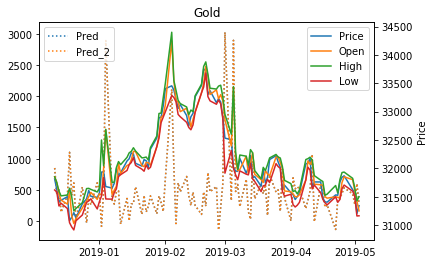

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax2.plot( data['test'].Price, label='Price' ); 
ax2.plot( data['test'].Open,  label='Open' );  
ax2.plot( data['test'].High,  label='High' );  
ax2.plot( data['test'].Low,   label='Low' );   
ax1.plot( data['test'].Pred,  label='Pred', linestyle=':', );  
ax1.plot( data['test'].Pred_2,  label='Pred_2', linestyle=':' );  

plt.title('Gold')
plt.ylabel('Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

(array([20., 47., 24.,  6.,  0.,  0.,  0.,  1.,  0.,  3.]),
 array([-139. ,  177.3,  493.6,  809.9, 1126.2, 1442.5, 1758.8, 2075.1,
        2391.4, 2707.7, 3024. ]),
 <a list of 10 Patch objects>)

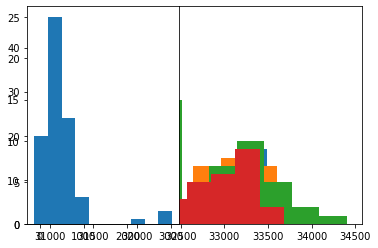

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(1, 2, 1)

ax1.hist( data['test'].Price )
ax1.hist( data['test'].Open )
ax1.hist( data['test'].High )
ax1.hist( data['test'].Low )
ax2.hist( data['test'].Pred )

In [28]:

os.makedirs( os.path.dirname(outfile), exist_ok=True ) 
pd.concat([data['train'], data['test']], sort=False).to_csv( outfile, index=False )
outfile

'E:\\Internship\\Gold/module_3/GOLD.csv'

In [29]:
model_new_linear = LinearRegression().fit( data['train'][ X_fields ], data['train']['new'] )
model_new_linear.score( data['test'][ X_fields ], data['test']['new'] )

0.9999683016109173

In [30]:
model_new_linear.coef_


array([ 1.01202641, -1.00094252,  1.00492221, -1.01604305])

In [31]:
model_new_linear.intercept_


-0.2161630441088107

In [32]:
features = {
    "train": PolynomialFeatures(2).fit_transform( data['train'][ X_fields ] ),
    "test":  PolynomialFeatures(2).fit_transform( data['test'][  X_fields ] ),    
}
model_new_poly = LinearRegression().fit( features['train'], data['train']['new'] )
model_new_poly.score( features['test'], data['test']['new'] )

0.999999856336434

In [34]:

data['test']['new_linear'] = model_new_linear.predict( data['test'][ X_fields ] )
data['test']['new_poly']   = model_new_poly.predict(   features['test'] )

C:\Users\iamakhilesh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\iamakhilesh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


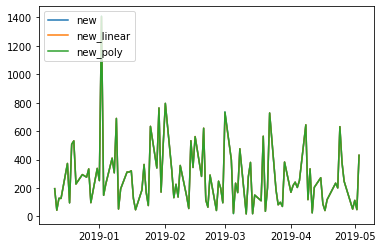

In [35]:

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot( data['test']['new'],        label='new',        linestyle='-', );  
ax1.plot( data['test']['new_linear'], label='new_linear', linestyle='-', );  
ax1.plot( data['test']['new_poly'],   label='new_poly',   linestyle='-', );  
ax1.legend(loc='upper left')

In [36]:

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split

In [37]:
ADANIPORTS = pd.read_csv( r"E:\Internship\Large_Cap\Large_Cap\ADANIPORTS.csv", parse_dates=['Date'], index_col='Date' )
ADANIPORTS = ADANIPORTS[ ADANIPORTS.Series == 'EQ' ]
NIFTY50    = pd.read_csv( r"E:\Internship\Nifty50\Nifty50\Nifty50.csv", parse_dates=['Date'], index_col='Date' )

In [38]:
ADANIPORTS.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,ADANIPORTS,EQ,357.95,359.00,359.75,350.85,356.00,356.20,354.78,1530781,5.430939e+08,14738,554124,36.20
2017-05-16,ADANIPORTS,EQ,356.20,354.20,358.15,351.15,353.55,354.50,354.64,1321254,4.685718e+08,24113,465010,35.19
2017-05-17,ADANIPORTS,EQ,354.50,354.50,354.80,347.55,348.95,348.55,349.74,1239867,4.336325e+08,19750,571621,46.10
2017-05-18,ADANIPORTS,EQ,348.55,344.30,359.55,342.20,348.15,347.90,350.16,3618961,1.267198e+09,76390,963959,26.64
2017-05-19,ADANIPORTS,EQ,347.90,349.05,352.50,345.30,350.45,349.45,348.91,1302961,4.546103e+08,20989,492222,37.78


In [39]:
NIFTY50.head()


,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [40]:

prices = pd.concat([ ADANIPORTS['Close Price'], NIFTY50['Close'] ], axis=1)
prices.columns = ['ADANIPORTS', 'NIFTY50']
prices.head()

,ADANIPORTS,NIFTY50
Date,,
2017-05-15,356.20,9445.40
2017-05-16,354.50,9512.25
2017-05-17,348.55,9525.75
2017-05-18,347.90,9429.45
2017-05-19,349.45,9427.90


In [41]:
returns = prices.pct_change().dropna(axis=0)
returns.head()

,ADANIPORTS,NIFTY50
Date,,
2017-05-16,-0.004773,0.007078
2017-05-17,-0.016784,0.001419
2017-05-18,-0.001865,-0.010109
2017-05-19,0.004455,-0.000164
2017-05-22,0.014308,0.001098


In [42]:
X  = returns['NIFTY50']
Y  = returns['ADANIPORTS']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ADANIPORTS   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     165.4
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           7.89e-33
Time:                        02:40:04   Log-Likelihood:                 1313.3
No. Observations:                 493   AIC:                            -2623.
Df Residuals:                     491   BIC:                            -2614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.331      0.741      -0.002       0.001
NIFTY50        1.3592      0.106     12.861      0.000       1.152       1.567
==============================================================================
Omnibus:                      125.391   Durbin-Watson:                   2.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1075.176
Skew:                          -0.839   Prob(JB):                    3.38e-234
Kurtosis:                      10.037   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
NIFTY50['month']    = NIFTY50.index.map(   lambda date: f"{date.year}-{date.month}")
ADANIPORTS['month'] = ADANIPORTS.index.map(lambda date: f"{date.year}-{date.month}")

In [44]:
NIFTY50_monthly    = NIFTY50.groupby('month').last()
ADANIPORTS_monthly = ADANIPORTS.groupby('month').last()
ADANIPORTS_monthly.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
month,,,,,,,,,,,,,,
2017-10,ADANIPORTS,EQ,429.80,430.25,432.95,425.60,430.75,430.35,428.69,3418248,1.465379e+09,31803,2609911,76.35
2017-11,ADANIPORTS,EQ,403.45,401.35,401.35,396.00,400.00,398.00,399.22,5552149,2.216524e+09,50201,4047659,72.90
2017-12,ADANIPORTS,EQ,398.70,401.15,407.15,399.30,406.70,405.65,403.21,3574054,1.441100e+09,43173,2014822,56.37
2017-5,ADANIPORTS,EQ,340.35,341.50,345.75,336.55,341.75,339.00,339.69,12190256,4.140920e+09,94792,9389385,77.02
2017-6,ADANIPORTS,EQ,364.50,364.00,365.80,360.55,364.90,363.05,363.05,1386974,5.035435e+08,19945,358630,25.86


In [45]:
returns_monthly = pd.concat([ ADANIPORTS_monthly['Close Price'], NIFTY50_monthly['Close'] ], axis=1).pct_change().dropna()
returns_monthly.columns = ['ADANIPORTS', 'NIFTY50']
returns_monthly.head()

,ADANIPORTS,NIFTY50
month,,
2017-11,-0.075171,-0.010522
2017-12,0.019221,0.029741
2017-5,-0.164304,-0.086362
2017-6,0.070944,-0.010430
2017-7,0.090483,0.058419


In [46]:

X  = returns_monthly['NIFTY50']
Y  = returns_monthly['ADANIPORTS']
X1 = sm.add_constant(X)

model = OLS( Y, X1 )
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ADANIPORTS   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     44.65
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           1.02e-06
Time:                        02:41:05   Log-Likelihood:                 33.258
No. Observations:                  24   AIC:                            -62.52
Df Residuals:                      22   BIC:                            -60.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0087      0.013     -0.674      0.507      -0.036       0.018
NIFTY50        1.7670      0.264      6.682      0.000       1.219       2.315
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.067
Skew:                          -0.119   Prob(JB):                        0.967
Kurtosis:                       2.897   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""